In [54]:
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline

### Задача 1.
Даны значения величины заработной платы заемщиков банка (zp) и значения их поведенческого кредитного скоринга (ks):  
zp = [35, 45, 190, 200, 40, 70, 54, 150, 120, 110],  
ks = [401, 574, 874, 919, 459, 739, 653, 902, 746, 832].  
Используя математические операции, посчитать коэффициенты линейной регрессии,  
приняв за X заработную плату (то есть, zp - признак),  
а за y - значения скорингового балла (то есть, ks - целевая переменная).  
Произвести расчет как с использованием intercept, так и без.

#### 1. Нахожу коэффициенты B0 и B1 с помощью статистических формул

In [55]:
x = np.array([35, 45, 190, 200, 40, 70, 54, 150, 120, 110], dtype=np.float64)
y = np.array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832], dtype=np.float64)

In [56]:
B1 = (np.mean(x * y) - np.mean(x) * np.mean(y)) / (np.mean(x**2) - np.mean(x) ** 2)
B0 = np.mean(y) - B1 * np.mean(x)

print('B0 =', round(B0, 6))
print('B1 =', round(B1, 6))

print(f'Тогда получем модель вида y = B0 + B1 * x:\n\t y = {round(B0, 6)} + {round(B1, 6)} * x')

B0 = 444.177357
B1 = 2.620539
Тогда получем модель вида y = B0 + B1 * x:
	 y = 444.177357 + 2.620539 * x


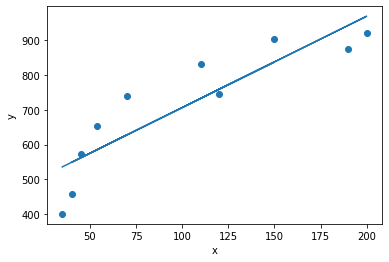

In [57]:
plt.scatter(x, y)
plt.plot(x, B0 + B1 * x)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

#### 2. Без intercept;

In [58]:
print('B0 =', round(0, 6))
print('B1 =', round(B1, 6))

print(f'Тогда получем модель вида y = B0 + B1 * x:\n\t y = {round(B0, 6)} + {round(B1, 6)} * x')

B0 = 0
B1 = 2.620539
Тогда получем модель вида y = B0 + B1 * x:
	 y = 444.177357 + 2.620539 * x


### Задача 2.
Посчитать коэффициент линейной регрессии при заработной плате (zp), используя градиентный спуск (без intercept).

#### Алгоритм как в лекции

In [59]:
def mse_(B1, y = y, x = x, n = 10):
    return np.sum((B1 * x - y)**2) / n

In [60]:
alpha = 0.000001
n = x.size
B0 = 0

In [61]:
# Сначала число итераций = 10
n_iter = 10

B1 = 0.1
for i in range(n_iter):
    B1 -= alpha * (2 / n) * np.sum((B1 * x - y) * x)
    print(f'i = {i:{4}};\t B1 = {round(B1, 10)};\t mse = {round(mse_(B1), 12)}')

i =    0;	 B1 = 0.25952808;	 mse = 493237.7212546963
i =    1;	 B1 = 0.4146606509;	 mse = 469503.15593253804
i =    2;	 B1 = 0.5655188231;	 mse = 447058.4982813111
i =    3;	 B1 = 0.7122203698;	 mse = 425833.6454035351
i =    4;	 B1 = 0.8548798195;	 mse = 405762.3042994031
i =    5;	 B1 = 0.9936085449;	 mse = 386781.7848094311
i =    6;	 B1 = 1.1285148499;	 mse = 368832.8038100976
i =    7;	 B1 = 1.2597040546;	 mse = 351859.3000509065
i =    8;	 B1 = 1.3872785768;	 mse = 335808.25905454205
i =    9;	 B1 = 1.5113380127;	 mse = 320629.547533212


In [62]:
# Увелиливаю число итераций = 2000
n_iter = 2000

B1 = 0.1
for i in range(n_iter):
    B1 -= alpha * (2 / n) * np.sum((B1 * x - y) * x)
    if (i % 100 == 0):
        print(f'i = {i:{4}};\t B1 = {round(B1, 10)};\t mse = {round(mse_(B1), 12)}')

i =    0;	 B1 = 0.25952808;	 mse = 493237.7212546963
i =  100;	 B1 = 5.5453784225;	 mse = 58151.31823171113
i =  200;	 B1 = 5.8687486387;	 mse = 56522.97550129376
i =  300;	 B1 = 5.8885313207;	 mse = 56516.88130936019
i =  400;	 B1 = 5.8897415574;	 mse = 56516.85850140053
i =  500;	 B1 = 5.8898155956;	 mse = 56516.858416040064
i =  600;	 B1 = 5.889820125;	 mse = 56516.85841572062
i =  700;	 B1 = 5.8898204021;	 mse = 56516.85841571941
i =  800;	 B1 = 5.889820419;	 mse = 56516.8584157194
i =  900;	 B1 = 5.8898204201;	 mse = 56516.85841571941
i = 1000;	 B1 = 5.8898204201;	 mse = 56516.85841571941
i = 1100;	 B1 = 5.8898204201;	 mse = 56516.85841571943
i = 1200;	 B1 = 5.8898204201;	 mse = 56516.85841571943
i = 1300;	 B1 = 5.8898204201;	 mse = 56516.85841571943
i = 1400;	 B1 = 5.8898204201;	 mse = 56516.85841571943
i = 1500;	 B1 = 5.8898204201;	 mse = 56516.85841571943
i = 1600;	 B1 = 5.8898204201;	 mse = 56516.85841571943
i = 1700;	 B1 = 5.8898204201;	 mse = 56516.85841571943
i = 1800;	 B1 

#### при i > 900 B1 и mse не меняются до 10-11-го знаков, тогда

In [63]:
print('B0 =', round(B0, 10))
print('B1 =', round(B1, 10))

print(f'Тогда получаем модель вида y = B1 * x:\n\t y = {round(B1, 10)} * x')

B0 = 0
B1 = 5.8898204201
Тогда получаем модель вида y = B1 * x:
	 y = 5.8898204201 * x


### Задача 3.
В каких случаях для вычисления доверительных интервалов и проверки статистических гипотез используется таблица значений функции Лапласа, а в каких - таблица критических точек распределения Стьюдента?

* Таблица Лапласа используется в случаях, когда известна Сигма генеральной совокупности
* Таблица критических значений t-критерия Стьюдента используется, если Сигма генеральной совокупности не известна

### Задача 4.*
Произвести вычисления как в пункте 2, но с вычислением intercept. Учесть, что изменение коэффициентов должно производиться на каждом шаге одновременно (то есть изменение одного коэффициента не должно влиять на изменение другого во время одной итерации).

#### Другая реализация алгоритма градиентного спуска

In [64]:
def mse_1(B0, B1, y, x, n):
    return np.sum((B0 + B1 * x - y)**2) / n

# Функция градиентного спуска;
# Параметры: диапазоны значений x, y, длина шага, допустимая погрешность (tolerance)
def gradient_descent_usual(x, y, alpha, tolerance):
    
    # сумма значений x
    sx = sum(x)
    
    # сумма значений y
    sy = sum(y)
    
    # сумма произведения значений x на y
    list_xy = []
    [list_xy.append(x[i]*y[i]) for i in range(len(x))]
    sxy = sum(list_xy)
    
    # сумма квадратов значений
    list_x_sq = []
    [list_x_sq.append(x[i]**2) for i in range(len(x))]
    sx_sq = sum(list_x_sq)
    
    # количество значений
    num = len(x)
    
    # начальные значения коэффициентов, определенные псевдослучайным образом
    a = float(random.uniform(-0.1, 0.1))
    b = float(random.uniform(-0.1, 0.1))
    
    # создаю массив с ошибками, для старта используем значения 1 и 0
    # после завершения спуска стартовые значения удалим
    errors = [1, 0]
    
    # запускаю цикл спуска
    # цикл работает до тех пор, пока отклонение последней ошибки суммы квадратов от предыдущей, не будет меньше tolerance
    ab = [0, 0]
    i = 0
    while abs(errors[-1] - errors[-2]) > tolerance:
        i += 1
        a_step = a - alpha * (num*a + b*sx - sy) / num
        b_step = b - alpha * (a*sx + b*sx_sq - sxy) / num
        
        a = a_step
        b = b_step
        ab = [a, b]
        
        mse__ = mse_1(a, b, x, y, num)
        
        if (i % 50 == 0):
            print (f'i = {i:{4}};\t a = {round(a, 10)};\t b = {round(b, 10)};\t mse = {round(mse__, 12)}')
            
        errors.append(mse__)
        
    return (ab), (errors[2:])

In [65]:
alpha     = 0.000001
tolerance = 0.1

list_param_gradient_descence = gradient_descent_usual(x, y, alpha, tolerance)

i =   50;	 a = 0.1179014593;	 b = 2.9128566018;	 mse = 4076001.898180393
i =  100;	 a = 0.1344908553;	 b = 4.4015706712;	 mse = 9654180.870907096
i =  150;	 a = 0.1455984394;	 b = 5.1455277728;	 mse = 13329507.374456815
i =  200;	 a = 0.153966478;	 b = 5.5172960916;	 mse = 15387837.984693443
i =  250;	 a = 0.160965406;	 b = 5.7030648214;	 mse = 16471741.926281553
i =  300;	 a = 0.1672800917;	 b = 5.7958811337;	 mse = 17027139.634360623
i =  350;	 a = 0.1732527948;	 b = 5.8422449141;	 mse = 17308044.992736913
i =  400;	 a = 0.179054558;	 b = 5.8653942608;	 mse = 17449183.695540853
i =  450;	 a = 0.184770859;	 b = 5.8769423041;	 mse = 17519827.943530403
i =  500;	 a = 0.190444415;	 b = 5.8826926509;	 mse = 17555081.509633116
i =  550;	 a = 0.1960965736;	 b = 5.8855456266;	 mse = 17572608.49189403
i =  600;	 a = 0.2017380033;	 b = 5.8869506549;	 mse = 17581266.67110706
i =  650;	 a = 0.2073740356;	 b = 5.8876320786;	 mse = 17585490.21837557
i =  700;	 a = 0.2130073347;	 b = 5.8879518846;	

In [66]:
print('Значения коэффициентов B0 и B1:')
print('\tB0 =', round(list_param_gradient_descence[0][0], 6))
print('\tB1 =', round(list_param_gradient_descence[0][1], 6))
print()

print('Количество итераций в градиентном спуске:')
print(f'\ti = {len(list_param_gradient_descence[1])}')

Значения коэффициентов B0 и B1:
	B0 = 0.229113
	B1 = 5.888145

Количество итераций в градиентном спуске:
	i = 843


#### Что-то не так... коэффициенты и графики разные

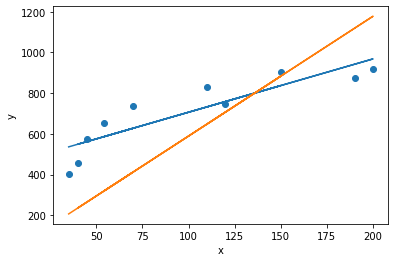

In [67]:
B0 = list_param_gradient_descence[0][0]
B1 = list_param_gradient_descence[0][1]
plt.scatter(x, y)
plt.plot(x, 444.17 + 2.62 * x)
plt.plot(x, B0 + B1 * x)
plt.xlabel('x')
plt.ylabel('y')
plt.show()